In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir('C:/Users/cspru/Desktop/CSC 8633 - Group Project/anonymisedData/')

In [4]:
df_assessments = pd.read_csv("assessments.csv")
df_courses = pd.read_csv("courses.csv")
df_vle = pd.read_csv("vle.csv")
df_sa = pd.read_csv("studentAssessment.csv")
df_si = pd.read_csv("studentInfo.csv")
df_sr = pd.read_csv("studentRegistration.csv")
df_sv = pd.read_csv("studentVle.csv")

In [5]:
df_si.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [6]:
df_vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


### Number of attempts by students

In [9]:
student_attempt_credit_df = df_si[['id_student', 'num_of_prev_attempts', 'studied_credits']].groupby('id_student').median()

D:\Anaconda\envs\spyder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


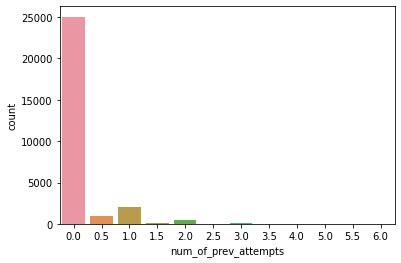

In [10]:
sns.countplot(student_attempt_credit_df.num_of_prev_attempts);

### Check for the popular courses

D:\Anaconda\envs\spyder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='code_module', ylabel='count'>

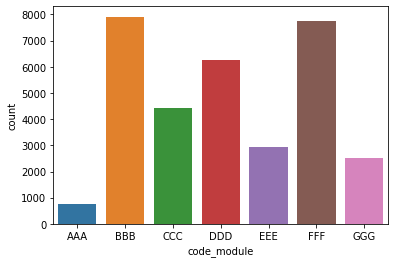

In [11]:
sns.countplot(df_si.code_module)

### Count of various Activity Types

In [12]:
studentVle_df = df_sv.merge(df_vle, on = 'id_site', how = 'left')

D:\Anaconda\envs\spyder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'forumng'),
  Text(1, 0, 'homepage'),
  Text(2, 0, 'oucontent'),
  Text(3, 0, 'subpage'),
  Text(4, 0, 'url'),
  Text(5, 0, 'resource'),
  Text(6, 0, 'glossary'),
  Text(7, 0, 'dataplus'),
  Text(8, 0, 'oucollaborate'),
  Text(9, 0, 'quiz'),
  Text(10, 0, 'ouelluminate'),
  Text(11, 0, 'sharedsubpage'),
  Text(12, 0, 'questionnaire'),
  Text(13, 0, 'page'),
  Text(14, 0, 'externalquiz'),
  Text(15, 0, 'ouwiki'),
  Text(16, 0, 'dualpane'),
  Text(17, 0, 'repeatactivity'),
  Text(18, 0, 'folder'),
  Text(19, 0, 'htmlactivity')])

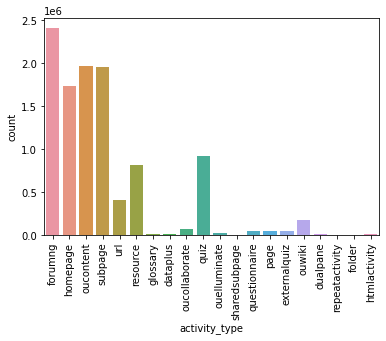

In [13]:
sns.countplot(studentVle_df.activity_type)
plt.xticks(rotation = 90)

### Student registration details

In [15]:
studentRegistration_df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [16]:
studentRegistration_df['unregistered'] = np.where(pd.isnull(studentRegistration_df.date_unregistration), 0, 1)
studentRegistration_df['registered'] = np.where(pd.isnull(studentRegistration_df.date_unregistration), 0, 1)

In [17]:
studentRegistration_df['register_days'] = (np.where(pd.isnull(studentRegistration_df.date_registration), 0, 
                                          studentRegistration_df.date_registration)).astype(int)
studentRegistration_df['unregister_days'] = (np.where(pd.isnull(studentRegistration_df.date_unregistration), 0, 
                                            studentRegistration_df.date_unregistration)).astype(int)
studentRegDays_df = studentRegistration_df[['id_student', 'register_days', 
                                   'unregister_days']].groupby(['id_student']).mean()
studentRegDays_df = studentRegDays_df.reset_index()
studentRegDays_df.head()

,id_student,register_days,unregister_days
0,3733,-68.0,-8.0
1,6516,-52.0,0.0
2,8462,-87.5,68.5
3,11391,-159.0,0.0
4,23629,-47.0,0.0


In [20]:
studentInterest_df = studentRegistration_df[['id_student', 'registered', 'unregistered']].groupby(['id_student']).sum()
studentInterest_df = studentInterest_df.reset_index()

<AxesSubplot:>

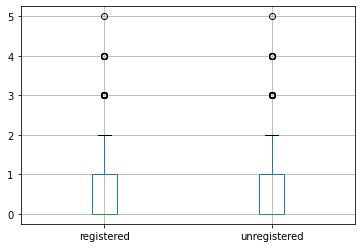

In [21]:
studentInterest_df[['registered', 'unregistered']].boxplot()

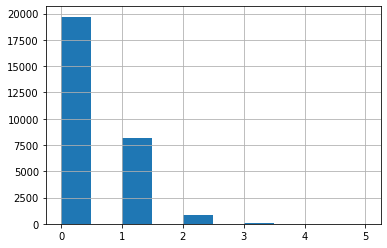

In [22]:
studentInterest_df.unregistered.hist();